<a href="https://colab.research.google.com/github/DaveChui/Machine_Learning_week_II_IP_Dave_Njoroge/blob/main/Machine_Learning_week_2_IP_04_2022_Dave_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Problem Definition
####a) Specifying the Question
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

##2. Importing Libraries, Loading and Reading the Data 

In [1]:
# Importing the necessary python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Other Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

#seaborn theme
sns.set_theme(style="darkgrid")

#VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [64]:
# Loading the dataset and preview first and the last 5 records
housedf = pd.read_csv('/content/house_data.csv')
housedf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
housedf.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,2008,98144,47.5941,-122.299,1020,1357


####~Checking the data

In [59]:
# viewing information of about our dataset
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#Learning a few things about our dataset
housedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Checking the number of records and features in our dataset
housedf.shape

(21613, 20)

#####Our dataset has 21613 records and 20 fields.

##3. Data Cleaning

In [8]:
#checking for duplicates in our dataset
housedf.duplicated().sum()

3

In [9]:
housedf = df.drop_duplicates()

housedf.duplicated().sum()

0

#####There were 3 duplicated records which have been deleted through the code above

In [51]:
# Checking for Null values in the dataset
housedf.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#####There are no null values in the dataset

####Encoding

In [67]:
# The Year renovated column will be converted to 1 and 0 to signify if a house has been renovated (1) or not (0)
# Also, the same will be done about the availabilty of a basement
# The encoded column will be stored in the data frame as a new column

housedf['renovated'] = housedf['yr_renovated'].mask(housedf['yr_renovated'] > 1, 1)

In [68]:
# Also, the same will be done about the availabilty of a basement the we preview the data
housedf['basement'] = housedf['sqft_basement'].mask(housedf['sqft_basement'] > 1, 1)
housedf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0


In [69]:
# Will drop the yr reinovated and sqft_basement columns as we no longer require them
housedf = housedf.drop(['yr_renovated'], axis=1)
housedf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,0,0


In [70]:
# After dropping the 2 fields, we preview our data to see the changes
housedf = housedf.drop(['sqft_basement'], axis=1)
housedf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


####Checking and dealing with outliers

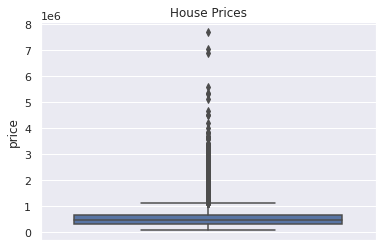

In [15]:
# boxplots to show the outliers in the dataset
# Outliers for prices of a house

sns.boxplot(data=housedf, y = 'price')
plt.title('House Prices')
plt.show()

In [52]:
# Handling the outliers

# Using the IQR method

q25 = housedf['price'].quantile(0.25)
q75 = housedf['price'].quantile(0.75)
# IQR and limits
IQR = q75 - q25
IQR

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR
# Identify and handle Outliers

housedf[housedf['price'] > upper_limit]

housedf = housedf[housedf['price'] < upper_limit]

housedf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


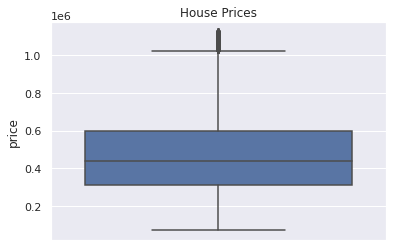

In [17]:
# Output new price boxplot to confirm whether the outliers have been dealt with
sns.boxplot(data=housedf, y = 'price')
plt.title('House Prices')
plt.show()

#####As per the above boxplot, the outliers have successfully been dealt with.

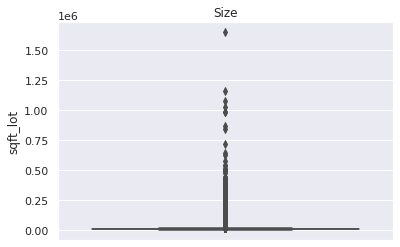

In [18]:
##Checking for outliers in the sqft_lot field

sns.boxplot(data=housedf, y = 'sqft_lot')
plt.title('Size')
plt.show()

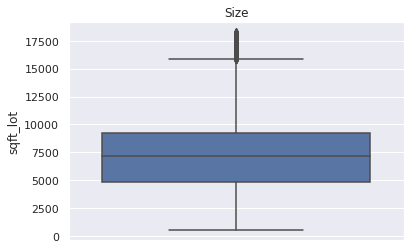

In [19]:
# Using the IQR method to deal with outliers

q25 = housedf['sqft_lot'].quantile(0.25)
q75 = housedf['sqft_lot'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

housedf = housedf[housedf['sqft_lot'] < upper_limit]

sns.boxplot(data=housedf, y = 'sqft_lot')
plt.title('Size')
plt.show()

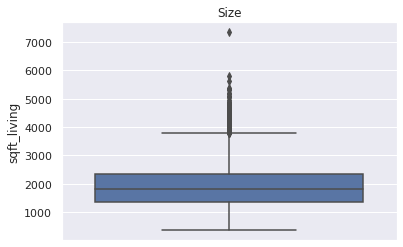

In [20]:
#Checking for outliers in the sqft_living field
sns.boxplot(data=housedf, y = 'sqft_living')
plt.title('Size')
plt.show()

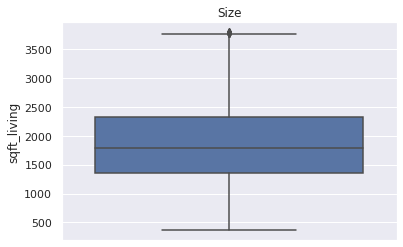

In [21]:
# Using the IQR method to deal with outliers

q25 = housedf['sqft_living'].quantile(0.25)
q75 = housedf['sqft_living'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

housedf = housedf[housedf['sqft_living'] < upper_limit]

sns.boxplot(data=housedf, y = 'sqft_living')
plt.title('Size')
plt.show()

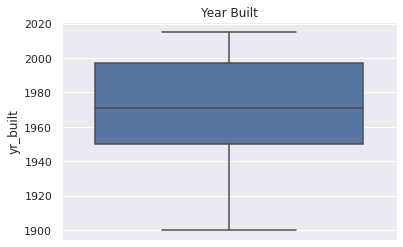

In [22]:
# Lets see if the years have any outlier
sns.boxplot(data=housedf, y = 'yr_built')
plt.title('Year Built')
plt.show()

#####There are no oultiers as per the above boxplot.

## 4. Exploratory Data Analysis

#### a. Univariate Analysis

In [23]:
# Average price of houses

housedf['price'].mean()

461132.8767130919

In [25]:
# Statistical Summary of house Prices
housedf['price'].describe()

count    1.795000e+04
mean     4.611329e+05
std      1.994148e+05
min      7.800000e+04
25%      3.069035e+05
50%      4.250000e+05
75%      5.800000e+05
max      1.120000e+06
Name: price, dtype: float64

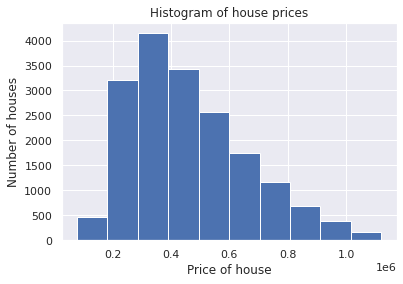

In [26]:
# Price of House and Number of houses distribution
# 2 visuals
housedf['price'].hist()
plt.title('Histogram of house prices')
plt.xlabel('Price of house')
plt.ylabel('Number of houses')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


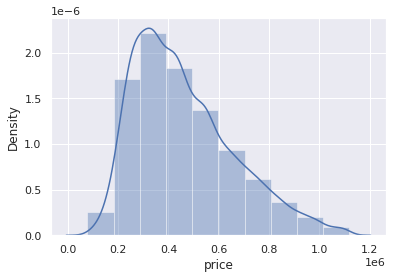

In [27]:
sns.distplot(a=housedf['price'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


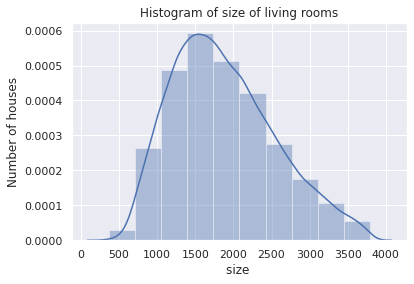

In [28]:
# another histogram showing distribution of the size of living rooms 
sns.distplot(a=housedf['sqft_living'], bins=10)
plt.title('Histogram of size of living rooms')
plt.xlabel('size ')
plt.ylabel('Number of houses')
plt.show()

####The histograms above display an normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


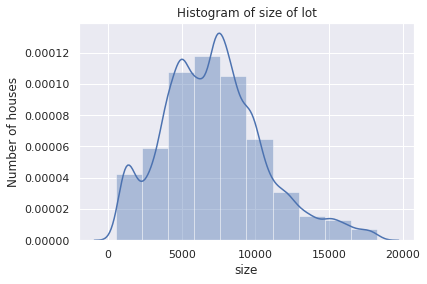

In [29]:
# Histogram for size of parking lot
sns.distplot(a=housedf['sqft_lot'], bins=10)
plt.title('Histogram of size of lot')
plt.xlabel('size')
plt.ylabel('Number of houses')
plt.show()

####The above histogram shows a distribution that is not normal.

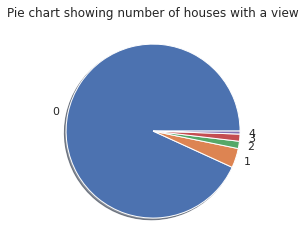

In [30]:
# Pie chart for houses with a view
plt.pie(housedf['view'].value_counts(), labels=[0, 1, 2, 3, 4], shadow=True)
plt.title('Pie chart showing number of houses with a view')
plt.show()

####As per above pie chart, majority of the houses do not have a view.

([<matplotlib.patches.Wedge at 0x7f05892613d0>,
 [Text(-0.026060067488888984, -1.0996912625289312, '0'),
  Text(0.026060131839218095, 1.0996912610039797, '1')],
 [Text(-0.014214582266666716, -0.5998315977430533, '99.246'),
  Text(0.014214617366846231, 0.5998315969112615, '0.754')])

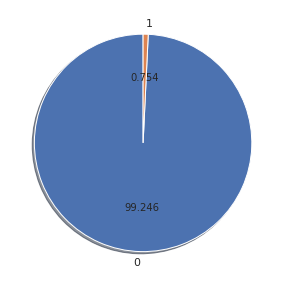

In [72]:
# plotting a piechart of the waterfront
plt.figure(figsize=(5,5))
plt.pie(housedf['waterfront'].value_counts(),startangle=90,autopct='%.3f',
        labels=['0','1'],shadow=True)

####From the above pie chart, we can observe that 99.2% of houses don't have a waterfront.

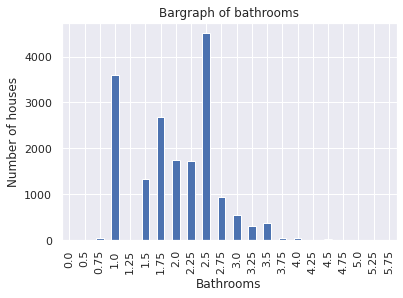

In [31]:
# Bar graph showing houses based on the number of bathrooms
housedf.groupby('bathrooms')['bathrooms'].count().plot(kind='bar')
plt.title('Bargraph of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of houses')
plt.show()

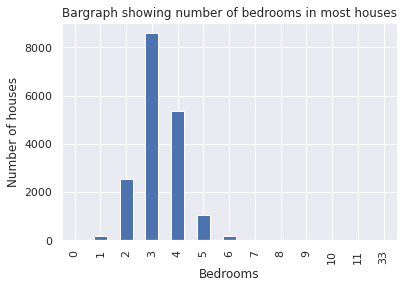

In [33]:
# Bar graph showing houses based on the number of bathroomsbedrooms
housedf.groupby('bedrooms')['bedrooms'].count().plot(kind='bar')
plt.title('Bargraph showing number of bedrooms in most houses')
plt.xlabel('Bedrooms')
plt.ylabel('Number of houses')
plt.show()

####b. Bivariate Analysis
######Scatter plots

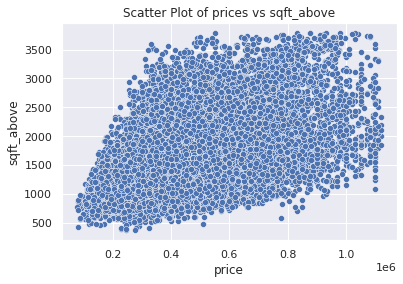

In [38]:
# Scatter plot showing price vs sqft above

sns.scatterplot(x='price', y='sqft_above', data=housedf)
plt.title('Scatter Plot of prices vs sqft_above')
plt.show()

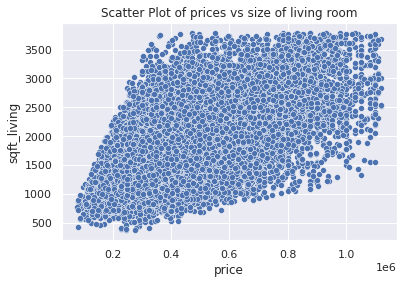

In [39]:
# Scatter Plot showing price of a house vs sqft_living

sns.scatterplot(x='price', y='sqft_living', data=housedf)
plt.title('Scatter Plot of prices vs size of living room')
plt.show()

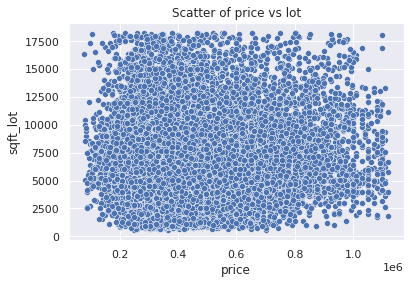

In [40]:
# Scatter Plot showing price of a house vs parking lot size
sns.scatterplot(x='price', y='sqft_lot', data=housedf)
plt.title('Scatter of price vs lot')
plt.show()

####Line Graph

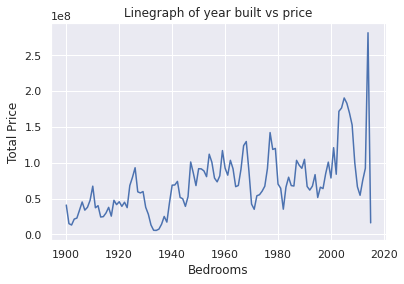

In [42]:
# Establishing the relationship between when a house was built and it's current price

housedf.groupby('yr_built')['price'].sum().plot()
plt.title('Linegraph of year built vs price')
plt.xlabel('Bedrooms')
plt.ylabel('Total Price')
plt.show()

####As observed from the above line graph, the prices have steadily been rising due to several factors e.g asset appreciation, inflation among others with an unexpected surge in 2020 which can be attributed to the Covid 19 pandemic.

####Box Plots

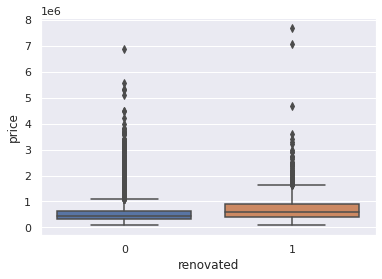

In [71]:
# Boxplots of renovated houses and houses with a basement

sns.boxplot(x='renovated', y='price', data=housedf)

####We can tell from the aboce box plot that renovated houses are more costly.

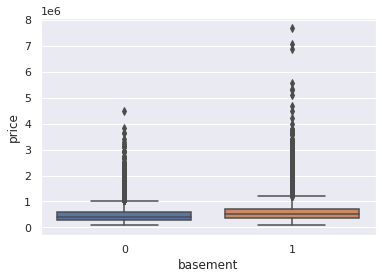

In [73]:
sns.boxplot(x='basement', y='price', data=housedf)

####Using the same relationship, we can observe that houses that have a basement slightly cost cost higher.

####c. Multicolinearity

In [74]:
# First, we're going to drop the ID field as we won't be needing it in any of our data analysis
housedf = housedf.drop(['id'], axis=1)

In [75]:
# Preview to ensure changes have taken effect
housedf.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0


In [78]:
# We will now split the data into independent and dependent variables

X_corr = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'zipcode', 'renovated','basement']]

y_corr = housedf['price']

X_corr.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,renovated,basement
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.154178,-0.152668,0.018553,0.163471
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.506019,-0.203866,0.050260,0.163534
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.318049,-0.199430,0.055094,0.204495
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.053080,-0.129574,0.007745,-0.035346
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,0.489319,-0.059121,0.006260,-0.256560
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,-0.026161,0.030285,0.093294,0.037227
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,-0.053440,0.084827,0.104062,0.181808
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,-0.361417,0.003026,-0.060139,0.135577
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.446963,-0.184862,0.014008,0.051838
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,0.423898,-0.261190,0.023178,-0.210991


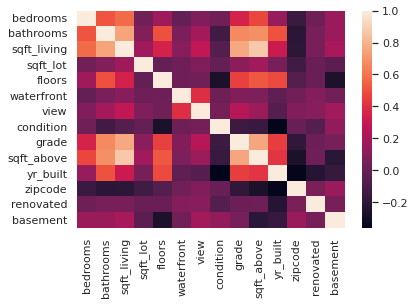

In [79]:
sns.heatmap(X_corr.corr())

In [80]:
# VIF

# We shall determiine the VIF score for each of our factors

vif = pd.DataFrame()

vif['feature'] = X_corr.columns
vif['VIF Score'] = [variance_inflation_factor(X_corr.values, i) for i in range(len(X_corr.columns))]
vif

,feature,VIF Score
0,bedrooms,23.189897
1,bathrooms,29.016335
2,sqft_living,103.309765
3,sqft_lot,1.203138
4,floors,16.236356
5,waterfront,1.211310
6,view,1.511401
7,condition,34.698093
8,grade,131.432605
9,sqft_above,94.224738


######Per the above VIF scores, we can observe that features like yr_built, zipcode,grade and sqft_living have high colinearity compared to other features like sqft_lot and waterfront.

###Regression.

######We will first split our data into training and test data sets for the purposes of modelling.

In [82]:
X = housedf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'renovated','basement']].values

y = housedf['price'].values

In [83]:
print(X.shape)
print(y.shape)

(21613, 14)
(21613,)


######Our set has 21613 records are 14 features.

In [84]:
# standard scaling

# We will require to scale our values so as to 'unify' them and avoid bias
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.39873715, -1.44746357, -0.97983502, ...,  1.87015159,
        -0.21013501, -0.80410155],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.87956753,
         4.75884527,  1.24362401],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.9333882 ,
        -0.21013501, -0.80410155],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
        -0.21013501, -0.80410155],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.95207846,
        -0.21013501, -0.80410155],
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
        -0.21013501, -0.80410155]])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_test.shape)

(17290, 14)
(4323,)


##Linear Regression

In [86]:
# We first perform linear regression, which will act as our baseline model

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

In [88]:
# We shall display the values against the original values

df_linear = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred})
df_linear

,Original Values,Predicted Values
0,297000.0,2.890163e+05
1,1580000.0,1.491097e+06
2,562100.0,5.202088e+05
3,631500.0,5.588919e+05
4,780000.0,8.624610e+05
...,...,...
4318,844000.0,9.441755e+05
4319,335500.0,2.813064e+05
4320,369950.0,2.978147e+05
4321,300000.0,2.324228e+05


In [89]:
# Check the coefficients of the values used in the linear regressor

coef_dict = {}

for coef, features in zip(linear_reg.coef_, X_corr.columns):
  coef_dict[features] = coef

coef_dict

{'basement': 7455.122000148764,
 'bathrooms': 32643.350924279774,
 'bedrooms': -34664.96391231101,
 'condition': 12319.89098736677,
 'floors': 14375.938526974598,
 'grade': 143444.31334184273,
 'renovated': 3428.157320885425,
 'sqft_above': 11328.617255789504,
 'sqft_living': 149900.95389472574,
 'sqft_lot': -10857.516533526883,
 'view': 35079.45973089602,
 'waterfront': 51615.3124523118,
 'yr_built': -104669.92969154389,
 'zipcode': -345.265067740409}

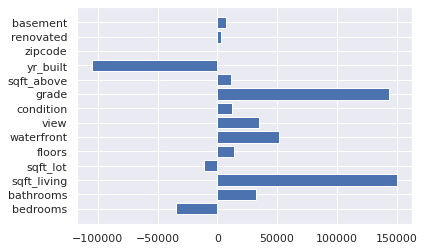

In [90]:
# Plot the coefficients
plt.barh(y=X_corr.columns, width=linear_reg.coef_)
plt.show()

#####As we can observe from the above illustration, the features year built, grade, and sqrt_living have the most effect in our linear regressor prediction.

In [92]:
# R2 score and RMSE Score

print('The R2 score for Linear Regressor =  ', linear_reg.score(X_test, y_test))
print('The RMSE for Linear Regressor =  ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The R2 score for Linear Regressor =   0.6450982672011055
The RMSE for Linear Regressor =   205580.74679222106


####Our R2 score = 0.64 and our RMSE =205580


# Quantile Regression

In [93]:
# Fill finalize with Quantile regression

# Fit the model
mod = smf.quantreg('y ~ X', df)
res = mod.fit(q=0.75)

In [94]:
# Print out model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4625
Model:                       QuantReg   Bandwidth:                   2.199e+04
Method:                 Least Squares   Sparsity:                    4.608e+05
Date:                Mon, 25 Apr 2022   No. Observations:                21613
Time:                        00:18:11   Df Residuals:                    21598
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.261e+05   1357.479    461.202      0.000    6.23e+05    6.29e+05
X[0]        -3.11e+04   1945.716    -15.983      0.000   -3.49e+04   -2.73e+04
X[1]        2.149e+04   2554.479      8.413      0.000    1.65e+04    2.65e+04
X[2]        1.272e+05   5973.561     21.299      0.0

####From the above we can observe an R of 0.462

# Ridge Regression

In [95]:
# Define the hyperparameter (alpha) for the model

ridge_gs = Ridge(normalize=True)

grid_ridge = GridSearchCV(estimator = ridge_gs, param_grid = {'alpha' : np.arange(0.01, 1, 20)}, n_jobs=1, cv=10, refit=True)

grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

{'alpha': 0.01}

In [96]:
# We will now perform ridge regression
ridge_reg = Ridge(alpha=0.01, normalize=True)

ridge_reg.fit(X_train, y_train)

y_pred_r = ridge_reg.predict(X_test)

df_ridge = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred_r})
df_ridge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


,Original Values,Predicted Values
0,297000.0,2.855378e+05
1,1580000.0,1.487110e+06
2,562100.0,5.217154e+05
3,631500.0,5.521462e+05
4,780000.0,8.673588e+05
...,...,...
4318,844000.0,9.417229e+05
4319,335500.0,2.811672e+05
4320,369950.0,2.973286e+05
4321,300000.0,2.297515e+05


In [97]:
# Coefficients

coef_dict_r = {}

for coef, features in zip(ridge_reg.coef_, X_corr.columns):
  coef_dict_r[features] = coef

coef_dict_r

{'basement': 13466.971388558652,
 'bathrooms': 32940.98312164389,
 'bedrooms': -33026.12695635297,
 'condition': 13104.13331963528,
 'floors': 12936.705203481399,
 'grade': 140505.47964901663,
 'renovated': 4144.644182079625,
 'sqft_above': 27280.5195640236,
 'sqft_living': 133816.59761815786,
 'sqft_lot': -10627.00573111783,
 'view': 36291.17045092563,
 'waterfront': 51158.19658109052,
 'yr_built': -102038.37484167382,
 'zipcode': 120.48139234950486}

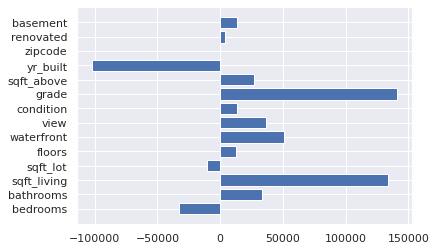

In [98]:
plt.barh(y=X_corr.columns, width=ridge_reg.coef_)
plt.show()

In [99]:
# R2 score and RMSE Score

print('The R2 score for Ridge Regressor = ', ridge_reg.score(X_test, y_test))
print('The RMSE for Ridge Regressor = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

The R2 score for Ridge Regressor =  0.6447813664582427
The RMSE for Ridge Regressor =  205672.5104391938


#####From the above observation, the results are almost similar to our linear regression model in terms of both R2 score and RMSE.

# Lasso Regression

In [100]:
# Parameters to use in the model
lasso_gs = Lasso(normalize=True)

grid_lasso = GridSearchCV(estimator = lasso_gs, param_grid = {'alpha' : np.arange(0.01, 1, 20)}, n_jobs=1, cv=10, refit=True)

grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

{'alpha': 0.01}

In [101]:
# We shall now build the model, fit and predict
lasso_reg = Lasso(alpha=0.01, normalize=True)

lasso_reg.fit(X_train, y_train)

y_pred_l = lasso_reg.predict(X_test)

df_lasso = pd.DataFrame({'Original Values' : y_test, 'Predicted Values' : y_pred_l})
df_lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


,Original Values,Predicted Values
0,297000.0,2.890178e+05
1,1580000.0,1.491086e+06
2,562100.0,5.201985e+05
3,631500.0,5.588904e+05
4,780000.0,8.624648e+05
...,...,...
4318,844000.0,9.441750e+05
4319,335500.0,2.813081e+05
4320,369950.0,2.978150e+05
4321,300000.0,2.324258e+05


In [102]:
# Coefficients

coef_dict_l = {}

for coef, features in zip(lasso_reg.coef_, X_corr.columns):
  coef_dict_l[features] = coef

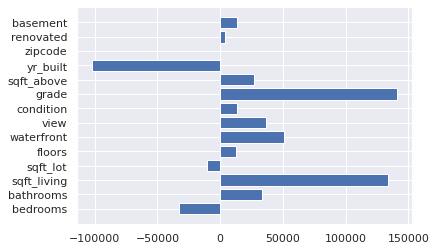

In [103]:
# Visualizing the coefficients
plt.barh(y=X_corr.columns, width=ridge_reg.coef_)
plt.show()

In [104]:
# R2 score and RMSE Score

print('The R2 score for Lasso Regressor = ', lasso_reg.score(X_test, y_test))
print('The RMSE for Lasso Regressor = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))


The R2 score for Lasso Regressor =  0.6450983197708884
The RMSE for Lasso Regressor =  205580.73156640696


#####As we can interpret from the illustration above, Lasso has reduced the renovated feature to zero thus removing it from among our predictor features.

# Elastic Net Regressor

In [105]:
# Hyprerparameters

# Hyperparameters will be two instead of one i.e alpha and l1

elastic = ElasticNet(normalize=True)

grid_net =  GridSearchCV(estimator=elastic, param_grid={'alpha' : np.arange(0.01, 2, 10), 'l1_ratio' : [.2, .4, .6, .8] }, cv=10, n_jobs=1, refit=True)

In [106]:
# Will fit the data onto the model and perform predictions

elastic_reg = ElasticNet(alpha=0.01, l1_ratio=0.8, normalize=True)

elastic_reg.fit(X_train, y_train)

y_pred_ela = elastic_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


In [107]:
df_ela = pd.DataFrame({'Original Values' : y_test, 'predictions' : y_pred_ela})
df_ela

,Original Values,predictions
0,297000.0,526220.863253
1,1580000.0,616281.467116
2,562100.0,514453.381211
3,631500.0,515804.967585
4,780000.0,581253.248117
...,...,...
4318,844000.0,581631.973258
4319,335500.0,520487.545850
4320,369950.0,530886.414840
4321,300000.0,506774.866062


In [108]:
# Coefficients

coef_dict_ela = {}

for coef, features in zip(elastic_reg.coef_, X_corr.columns):
  coef_dict_ela[features] = coef

coef_dict_ela

{'basement': 1855.5176403857186,
 'bathrooms': 4988.3606432923425,
 'bedrooms': 2873.3234398135833,
 'condition': 494.9725549197848,
 'floors': 2345.858417977933,
 'grade': 6467.364697062736,
 'renovated': 1315.0268151942848,
 'sqft_above': 5837.116543281614,
 'sqft_living': 6815.045538929139,
 'sqft_lot': 817.436411788611,
 'view': 3993.621319531942,
 'waterfront': 2751.0869300968498,
 'yr_built': 220.63176052887232,
 'zipcode': -370.48115713835324}

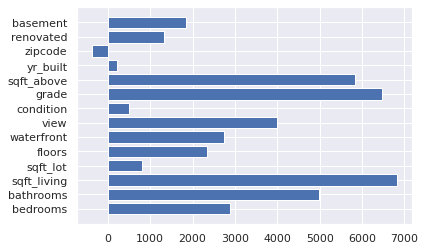

In [109]:
# Viz of the coefficients
plt.barh(y=X_corr.columns, width=elastic_reg.coef_)
plt.show()

In [110]:
# R2 score and RMSE Score

print('The R2 score for Elastic Net Regressor = ', elastic_reg.score(X_test, y_test))
print('The RMSE for Elastic Net Regressor = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ela)))

The R2 score for Elastic Net Regressor =  0.10203923571754048
The RMSE for Elastic Net Regressor =  327007.0079232615


#####As observed above, the RMSE is significantly higher than on the other models hence inapppropriate in our setting.

# Observation and conclusion.
####After cross checking the models' RMSE outcomes, we can choose the Ridge Regression Model as it yields the lowest RMSE value of 0.644